In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

0_amons_global.out  3_moreout.out	    output_FCHL_global.csv
0_amons_local.out   4_amons_local.out	    output_global_CM.csv
1_amons_global.out  4_amons.out		    output_global_FCHL.csv
1_amons_local.out   4_moreout.out	    output_global_SLATM.csv
1_amons.out	    output_aCM.csv	    output_global_SPAHM.csv
1_moreout.out	    output_amons_aCM.csv    output_SLATM.csv
2_amons_local.out   output_amons_FCHL.csv   output_SLATM_global.csv
2_amons.out	    output_amons_SLATM.csv  output_SOAP.csv
2_moreout.out	    output_amons_SOAP.csv   output_SPAHM_global.csv
3_amons_local.out   output_CM_global.csv
3_amons.out	    output_FCHL.csv


In [4]:
slatm_out = pd.read_csv("../out/output_amons_SLATM.csv", index_col=0)

In [5]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['frag_06_c00001', 'frag_15_c00001']","[[], [8]]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3..."
1,2,"['frag_15_c00001', 'frag_06_c00001']","[[8], []]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ..."
2,3,"['frag_06_c00001', 'frag_15_c00001']","[[], [8]]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3..."
3,4,"['frag_15_c00001', 'frag_06_c00001']","[[8], []]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ..."
4,5,"['frag_06_c00001', 'frag_15_c00001']","[[], [8]]",9.411302,10.411302,"[[(2, 7), (3, 8), (1, 9)], [(6, 1), (2, 2), (3..."
...,...,...,...,...,...,...
995,996,"['frag_06_c00001', 'frag_08_c00001', 'frag_15_...","[[], [8, 7], [6, 6, 8]]",9.269739,14.269739,"[[(2, 7), (3, 8), (1, 9)], [(2, 2), (3, 3)], [..."
996,997,"['frag_15_c00001', 'frag_06_c00001', 'frag_05_...","[[8, 8], [], [6, 8]]",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1..."
997,998,"['frag_15_c00001', 'frag_06_c00001', 'frag_05_...","[[8, 8], [], [6, 8]]",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1..."
998,999,"['frag_15_c00001', 'frag_05_c00001', 'frag_06_...","[[8, 8], [6, 8], []]",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(2..."


In [6]:
from ast import literal_eval 

In [7]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [8]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(slatm_out["Sorted Fragments"]))

21

In [10]:
# excess is missing Hs - to fix 

In [11]:
import qml

In [12]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [13]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [14]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [15]:
qm9_counts = count_ncharges(qm9_ncharges)

In [16]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [17]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../amons-qm9/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [18]:
def get_excess_count(frag_list):
    mols = [qml.Compound("../amons-qm9/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    return diff_count

In [19]:
slatm_out["Excess"] = slatm_out["Fragments"].apply(get_excess_frags)

In [20]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]"
1,2,"[frag_15_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ...","[frag_06_c00001, frag_15_c00001]"
2,3,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]"
3,4,"[frag_15_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ...","[frag_06_c00001, frag_15_c00001]"
4,5,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",9.411302,10.411302,"[[(2, 7), (3, 8), (1, 9)], [(6, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]"
...,...,...,...,...,...,...,...
995,996,"[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, ...",9.269739,14.269739,"[[(2, 7), (3, 8), (1, 9)], [(2, 2), (3, 3)], [...","[frag_06_c00001, frag_08_c00001, frag_15_c00001]"
996,997,"[frag_15_c00001, frag_06_c00001, frag_05_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]"
997,998,"[frag_15_c00001, frag_06_c00001, frag_05_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]"
998,999,"[frag_15_c00001, frag_05_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(2...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]"


In [21]:
# get counts in excess 
slatm_out["Excess Counts"] = slatm_out["Fragments"].apply(get_excess_count)

In [22]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts
0,1,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]","[4.0, 0.0, 0.0, 1.0, 0.0]"
1,2,"[frag_15_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ...","[frag_06_c00001, frag_15_c00001]","[4.0, 0.0, 0.0, 1.0, 0.0]"
2,3,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(2, 7), (3, 8), (1, 9)], [(1, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]","[4.0, 0.0, 0.0, 1.0, 0.0]"
3,4,"[frag_15_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",8.938018,9.938018,"[[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, ...","[frag_06_c00001, frag_15_c00001]","[4.0, 0.0, 0.0, 1.0, 0.0]"
4,5,"[frag_06_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 8.0]",9.411302,10.411302,"[[(2, 7), (3, 8), (1, 9)], [(6, 1), (2, 2), (3...","[frag_06_c00001, frag_15_c00001]","[4.0, 0.0, 0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
995,996,"[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, ...",9.269739,14.269739,"[[(2, 7), (3, 8), (1, 9)], [(2, 2), (3, 3)], [...","[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[7.0, 2.0, 1.0, 2.0, 0.0]"
996,997,"[frag_15_c00001, frag_06_c00001, frag_05_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]","[6.0, 1.0, 0.0, 3.0, 0.0]"
997,998,"[frag_15_c00001, frag_06_c00001, frag_05_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(1...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]","[6.0, 1.0, 0.0, 3.0, 0.0]"
998,999,"[frag_15_c00001, frag_05_c00001, frag_06_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 8.0, 8.0, ...",10.269930,14.269930,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(2...","[frag_05_c00001, frag_06_c00001, frag_15_c00001]","[6.0, 1.0, 0.0, 3.0, 0.0]"


In [23]:
excess_counts = slatm_out["Excess Counts"].to_list()

In [24]:
uniques = np.unique(excess_counts,axis=0)

In [25]:
unique_counts = np.zeros(len(uniques))

In [26]:
for count in excess_counts: 
    for i, unique in enumerate(uniques):
        if np.all((count - unique) == 0):
            unique_counts[i] += 1

In [27]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# need ncharges list and list of energies

In [30]:
import qml

In [31]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [32]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [33]:
ncharges = [mol.nuclear_charges for mol in mols]

In [34]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [35]:
energies = qm7["energy / Ha"].to_list()

In [36]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [37]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [38]:
coeff_energies = reg.coef_

In [39]:
coeff_energies = dict(zip(elements, coeff_energies))

In [40]:
coeff_energies

{1: -0.610028423353568,
 6: -38.01906466911171,
 7: -54.647732784759256,
 8: -75.09076868694648,
 16: -397.9423885459585}

In [41]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../amons-qm9/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    energy = float(energy)
    return energy

In [42]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [43]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [44]:
slatm_out["energies / Ha"] = slatm_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]),
                                                     axis=1)

In [45]:
slatm_out["energies / kcal/mol"] = slatm_out["energies / Ha"] * 627.5

In [56]:
slatm_out.sort_values(by='ObjValNoPen').iloc[150:200]

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts,energies / Ha,energies / kcal/mol
595,596,"[frag_15_c00001, frag_06_c00001, frag_08_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, ...",8.896152,13.896152,"[[(2, 2), (4, 4), (5, 5), (6, 6), (3, 9)], [(2...","[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[7.0, 2.0, 1.0, 2.0, 0.0]",0.103073,64.678132
594,595,"[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, ...",8.896152,13.896152,"[[(2, 7), (3, 8)], [(1, 1), (3, 3)], [(2, 2), ...","[frag_06_c00001, frag_08_c00001, frag_15_c00001]","[7.0, 2.0, 1.0, 2.0, 0.0]",0.103073,64.678132
603,604,"[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(2, 4), (3, 5), (4, 6)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
602,603,"[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(2, 4), (3, 5), (4, 6)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
600,601,"[frag_11_c00001, frag_04_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(2, 4), (3, 5), (4, 6)], [(1, 1), (2, 2)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
599,600,"[frag_04_c00001, frag_16_c00001, frag_11_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(7, 3), (5, 7), (6, 8), (1...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
598,599,"[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(2, 4), (3, 5), (4, 6)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
596,597,"[frag_11_c00001, frag_04_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(2, 4), (3, 5), (4, 6)], [(1, 1), (2, 2)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
597,598,"[frag_04_c00001, frag_16_c00001, frag_11_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(7, 3), (5, 7), (6, 8), (1...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334
601,602,"[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 7.0, 8.0, ...",8.896898,13.896898,"[[(1, 1), (2, 2)], [(2, 4), (3, 5), (4, 6)], [...","[frag_04_c00001, frag_11_c00001, frag_16_c00001]","[5.0, 2.0, 1.0, 2.0, 0.0]",0.063822,40.048334


In [57]:
slatm_out.iloc[24]["Excess"]

array([1., 1., 1., 1., 1., 1., 1., 6., 7., 8.])

In [52]:
unique_energies = np.unique(slatm_out["energies / Ha"])

In [53]:
args = []
for energy in unique_energies: 
    matches = slatm_out[slatm_out["energies / Ha"] == energy]
    # find minimum 
    argmin = matches["ObjValNoPen"].idxmin()
    args.append(argmin)

In [54]:
no_duplicates = slatm_out.loc[args]

In [55]:
import matplotlib.pyplot as plt
import matplotlib

In [56]:
matplotlib.rcParams.update({'font.size': 12})

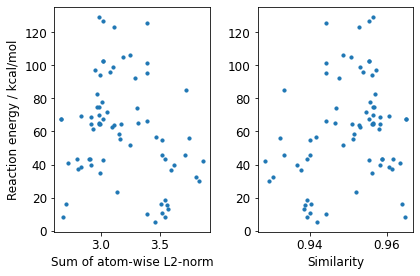

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(no_duplicates["ObjValNoPen"]), no_duplicates["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-no_duplicates["ObjValNoPen"]/(2*10**2))
ax[1].scatter(x, no_duplicates["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-amons-slatm-local.png", dpi=300)
plt.show()

In [58]:
len(no_duplicates)

72